# BMEN 509 Project ABC-DISC

Details/Information

In [8]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage import color
from scipy import signal, ndimage

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

In [9]:
# Constants
data_directory = os.path.join('.', 'Data')
file_names = [
    'sample.png'
]

#Note this is image-4.png from the Kaggle data set available here: https://www.kaggle.com/draaslan/blood-cell-detection-dataset

In [10]:
# Verify we can find our files
for file_name in file_names:
    name = os.path.join(data_directory, file_name)
    if not os.path.isfile(name):
        os.sys.exit('Cannot find file {}. Please make sure you have downloaded the data'.format(name))
print('Found all image files!')

Found all image files!


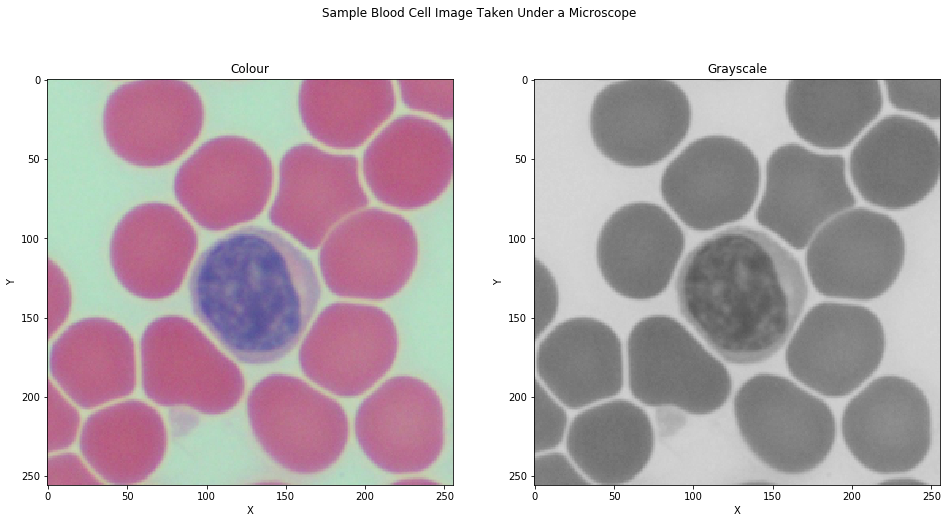

In [11]:
filename = os.path.join(data_directory, 'sample.png') #Read file and open image
img_rgb = io.imread(filename) #Colour image
img_gray = color.rgb2gray(img_rgb) #Grayscale image

plt.figure(figsize = (16,8))
plt.suptitle('Sample Blood Cell Image Taken Under a Microscope')

plt.subplot(121)
plt.imshow(img_rgb)
plt.title('Colour')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(122)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=1)
plt.title('Grayscale')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [12]:
#Need to double-check whether we actually need to convert to grayscale.
#Note there are many different conversion algorithms that apply different weightings.

#Useful links:
#https://en.wikipedia.org/wiki/Grayscale#Colorimetric_(perceptual_luminance-preserving)_conversion_to_grayscale
#https://stackoverflow.com/questions/3823752/display-image-as-grayscale-using-matplotlib
#https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

In [21]:
!python -m pip install opencv-python==4.1.2.30

    100% |████████████████████████████████| 28.3MB 168kB/s eta 0:00:01  9% |███                             | 2.6MB 1.6MB/s eta 0:00:17    28% |█████████                       | 8.0MB 1.5MB/s eta 0:00:14    47% |███████████████▏                | 13.4MB 1.4MB/s eta 0:00:11    51% |████████████████▍               | 14.5MB 45.7MB/s eta 0:00:010MB 68.8MB/s eta 0:00:01��█████████████████████████▌   | 25.2MB 38.9MB/s eta 0:00:01


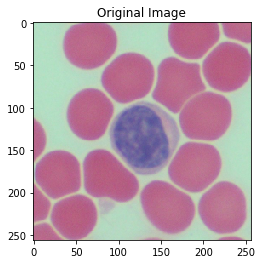

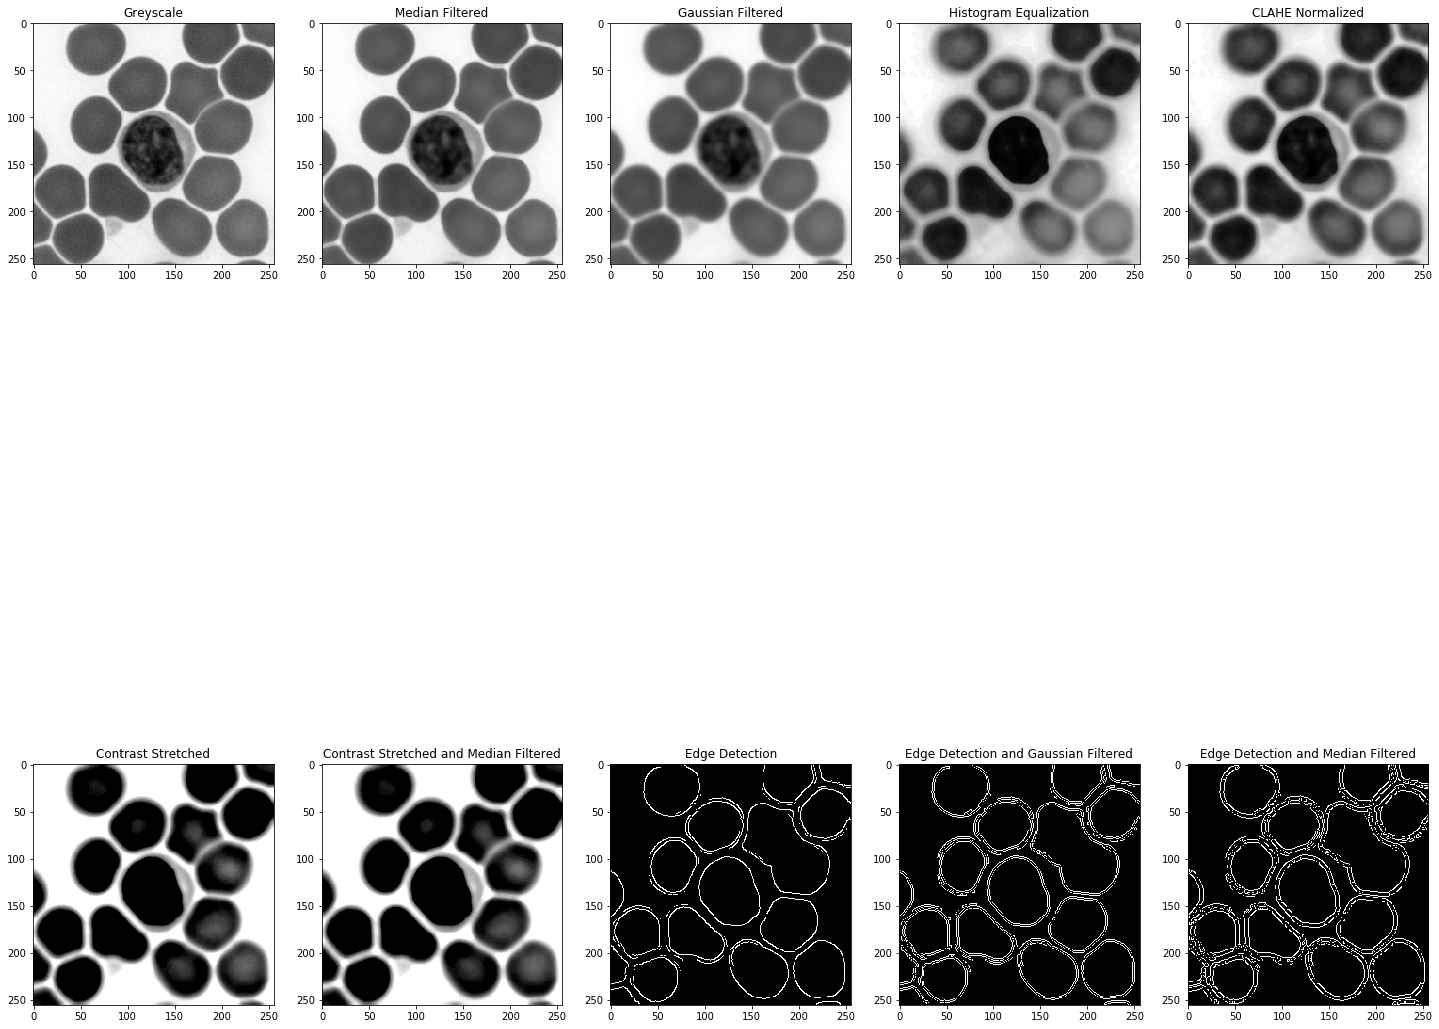

In [22]:
import cv2

'''
enhance: function that median filters, Gaussian filters, histogram equalization, CLAHE, 
         contrast stretching, edge detection, median filtered edge detection, Gaussian 
         filtered edge detection
input parameter: file name (has to be in same directory as this code - not in folder)
output: displays original image and an image for each step (10 steps)
'''

def enhance(file_name):
    # read original image
    image = cv2.imread(file_name)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));  plt.title("Original Image"); plt.show()

    # convet to gray scale image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.subplots(2, 5, figsize=(25, 25))
    plt.subplot(2,5,1); plt.imshow(gray, cmap='gray');   plt.title('Greyscale');


    # apply median filter for smoothning
    blurM = cv2.medianBlur(gray, 5)
    plt.subplot(2,5,2); plt.imshow(blurM, cmap='gray');   plt.title('Median Filtered');

    # apply gaussian filter for smoothning
    blurG = cv2.GaussianBlur(blurM, (9, 9), 0)
    plt.subplot(2,5,3); plt.imshow(blurG, cmap='gray');   plt.title('Gaussian Filtered');


    # histogram equalization
    histoNorm = cv2.equalizeHist(blurG)
    plt.subplot(2,5,4); plt.imshow(histoNorm, cmap='gray');   plt.title('Histogram Equalization');

    # create a CLAHE object for
    # Contrast Limited Adaptive Histogram Equalization (CLAHE)
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8))
    claheNorm = clahe.apply(histoNorm)
    plt.subplot(2,5,5); plt.imshow(claheNorm, cmap='gray');   plt.title('CLAHE Normalized');


    # contrast stretching
    # Function to map each intensity level to output intensity level.
    def pixelVal(pix, r1, s1, r2, s2):
        if (0 <= pix and pix <= r1):
            return (s1 / r1) * pix
        elif (r1 < pix and pix <= r2):
            return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
        else:
            return ((255 - s2) / (255 - r2)) * (pix - r2) + s2

        # Define parameters.


    r1 = 70
    s1 = 0
    r2 = 200
    s2 = 255

    # Vectorize the function to apply it to each value in the Numpy array.
    pixelVal_vec = np.vectorize(pixelVal)

    # Apply contrast stretching.
    contrast_stretched = pixelVal_vec(claheNorm, r1, s1, r2, s2)

    clahe_blurM = cv2.medianBlur(claheNorm, 5) #<-------------------- added this 
    
    contrast_stretched_blurM = pixelVal_vec(clahe_blurM, r1, s1, r2, s2)


    plt.subplot(2,5,6); plt.imshow(contrast_stretched, cmap='gray');   plt.title('Contrast Stretched');

    plt.subplot(2,5,7); plt.imshow(contrast_stretched_blurM, cmap='gray');   plt.title('Contrast Stretched and Median Filtered');
  
    # edge detection using canny edge detector
    edge = cv2.Canny(clahe_blurM, 100, 200)
    plt.subplot(2,5,8); plt.imshow(edge, cmap='gray');   plt.title('Edge Detection');


    edgeG = cv2.Canny(edge, 100, 200)
    plt.subplot(2,5,9); plt.imshow(edgeG, cmap='gray');   plt.title('Edge Detection and Gaussian Filtered');


    edgeM = cv2.Canny(edgeG, 100, 200)
    plt.subplot(2,5,10); plt.imshow(edgeM, cmap='gray');   plt.title('Edge Detection and Median Filtered');
    plt.show()
    
    return(edgeM)
img = enhance("sample.png")

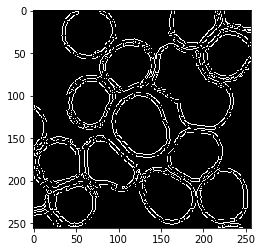

In [23]:
plt.imshow(img, cmap = 'gray') #final enhanced image
plt.show()

In [34]:
# read enhanced image
#img = cv2.imread('cell.png', 0)

# morphological operations
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(img, kernel, iterations = 1)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Adaptive thresholding on mean and gaussian filter
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
			cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
			cv2.THRESH_BINARY, 11, 2)
# Otsu's thresholding
ret4, th4 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Initialize the list
Cell_count, x_count, y_count = [], [], []

# read original image, to display the circle and center detection
display = cv2.imread("D:/Projects / ImageProcessing / DA1 / sample1 / cellOrig.png")

# hough transform with modified circular parameters
circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1.2, 20,
						param1 = 50, param2 = 28, minRadius = 1, maxRadius = 20)

# circle detection and labeling using hough transformation
if circles is not None:
		# convert the (x, y) coordinates and radius of the circles to integers
		circles = np.round(circles[0, :]).astype("int")

		# loop over the (x, y) coordinates and radius of the circles
		for (x, y, r) in circles:

				cv2.circle(display, (x, y), r, (0, 255, 0), 2)
				cv2.rectangle(display, (x - 2, y - 2),
							(x + 2, y + 2), (0, 128, 255), -1)
				Cell_count.append(r)
				x_count.append(x)
				y_count.append(y)
		# show the output image
		cv2.imshow("gray", display)
		cv2.waitKey(0)

# display the count of white blood cells
print(len(Cell_count))
# Total number of radius
print(Cell_count)
# X co-ordinate of circle
print(x_count)	
# Y co-ordinate of circle
print(y_count)	


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-k8sx3e60\opencv\modules\imgproc\src\hough.cpp:2253: error: (-215:Assertion failed) !_image.empty() && _image.type() == CV_8UC1 && (_image.isMat() || _image.isUMat()) in function 'cv::HoughCircles'
